In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from p0_common import read_csv, run_holding_period

In [12]:
#read csv
df_last_two_eth_pc_change = read_csv("__filtered_result__", "normalies_df_last_two_eth_pc_change")
df_last_two_usd_pc_change = read_csv("__filtered_result__", "normalies_df_last_two_usd_pc_change")
df_last_two_pc_change = pd.merge(df_last_two_eth_pc_change, df_last_two_usd_pc_change, on='punk_id')
df_last_two_txn = read_csv("", "mp_df_last_two_txn")

df_f2l_eth_pc_change = read_csv("__filtered_result__", "normalies_df_f2l_eth_pc_change")
df_f2l_usd_pc_change = read_csv("__filtered_result__", "normalies_df_f2l_usd_pc_change")
df_f2l_pc_change = pd.merge(df_f2l_eth_pc_change, df_f2l_usd_pc_change, on='punk_id')
df_headtail = read_csv("", "mp_df_headtail")

In [13]:
#cal holding period
df_last_two_holding_period = run_holding_period(df_last_two_txn, 'punk_id', 'block_time')
df_last_two_holding_period = df_last_two_holding_period[['punk_id', 'holding_period']]

df_f2l_holding_period = run_holding_period(df_headtail, 'punk_id', 'block_time')
df_f2l_holding_period = df_f2l_holding_period[['punk_id', 'holding_period']]
df_last_two_holding_period

c:\Users\hungh\下載\z Python_28.03\p0_common.py:87: FutureWarning: Passing <class 'int'> to shift is deprecated and will raise in a future version, pass Timestamp instead.
  df['previous'] = blk_time.shift(periods=-1, fill_value=0)


,punk_id,holding_period
0,0.0,16.773636
1,1.0,19.862662
2,14.0,16.708559
3,53.0,6.076514
4,89.0,3.335508
...,...,...
4431,9976.0,11.705930
4432,9979.0,4.312694
4433,9980.0,0.441461
4434,9982.0,1.089104


In [14]:
#cal pc_change_r
df_last_two_r = pd.merge(df_last_two_holding_period, df_last_two_pc_change, on='punk_id')
df_last_two_r['eth_r'] = np.exp((np.log(1+df_last_two_r['eth_pc_change']))/df_last_two_holding_period['holding_period']) -1
df_last_two_r['usd_r'] = np.exp((np.log(1+df_last_two_r['usd_pc_change']))/df_last_two_holding_period['holding_period']) -1
for n in ['eth_r', 'usd_r']:
    df_last_two_r = df_last_two_r[df_last_two_r[n] != float("inf")]

df_f2l_r = pd.merge(df_last_two_holding_period, df_f2l_pc_change, on='punk_id')
df_f2l_r['eth_r'] = np.exp((np.log(1+df_f2l_r['eth_pc_change']))/df_last_two_holding_period['holding_period']) -1
df_f2l_r['usd_r'] = np.exp((np.log(1+df_f2l_r['usd_pc_change']))/df_last_two_holding_period['holding_period']) -1
for n in ['eth_r', 'usd_r']:
    df_f2l_r = df_f2l_r[df_f2l_r[n] != float("inf")]

C:\Users\hungh\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
#export for p3 use
df_last_two_r[['punk_id', 'eth_r']].to_csv('__filtered_result__\\mp_df_last_two_eth_r.csv', index=False)
df_last_two_r[['punk_id', 'usd_r']].to_csv('__filtered_result__\\mp_df_last_two_usd_r.csv', index=False)
df_f2l_r[['punk_id', 'eth_r']].to_csv('__filtered_result__\\mp_df_f2l_eth_r.csv', index=False)
df_f2l_r[['punk_id', 'usd_r']].to_csv('__filtered_result__\\mp_df_f2l_usd_r.csv', index=False)

In [16]:
#checking--------------------------------------------------------------------------------------------------------------------------------
df_check = df_f2l_r.copy()
con = [float("inf"), 0, -1]
df_check = df_check[df_check['eth_r'].isin(con) == True]
df_check = df_check.sort_values(['eth_r'], ascending=[False])

In [17]:
def run_plot_graph(x, y, z):
    # plotting the points
    plt.scatter(x, y, alpha=0.2) 
    plt.xlabel('holding period', color='snow')
    plt.ylabel('rate with time adjustement', color='snow')
    plt.title(z, color='snow')

    '''z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")'''

    plt.show()

In [18]:
def run_remove_anomalies(file, column_num, percentile):
    p1_threshold = np.percentile(file.iloc[:,column_num], percentile)      #2 stdev (5%) for anomalies
    p2_threshold = np.percentile(file.iloc[:,column_num], 100-percentile)  #2 stdev (5%) for anomalies
    anomalies = file[(file.iloc[:,column_num] < p1_threshold) | (file.iloc[:,column_num] > p2_threshold)]
    normalies = file[(file.iloc[:,column_num] >= p1_threshold) & (file.iloc[:,column_num] <= p2_threshold)]
    return normalies

In [19]:
#remove anomalies
percentile = 30
df_last_two_r_eth2 = run_remove_anomalies(df_last_two_r, 4, percentile).reset_index(drop=True)
df_last_two_r_usd2 = run_remove_anomalies(df_last_two_r, 5, percentile).reset_index(drop=True)
df_f2l_r_eth2 = run_remove_anomalies(df_f2l_r, 4, percentile).reset_index(drop=True)
df_f2l_r_usd2 = run_remove_anomalies(df_f2l_r, 5, percentile).reset_index(drop=True)

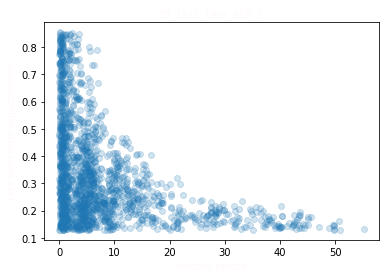

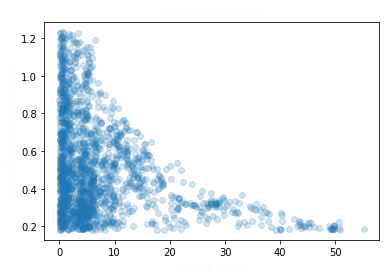

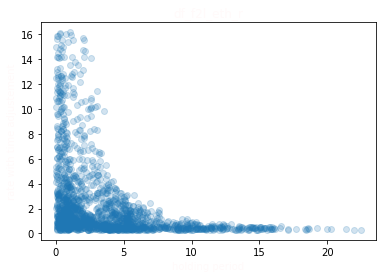

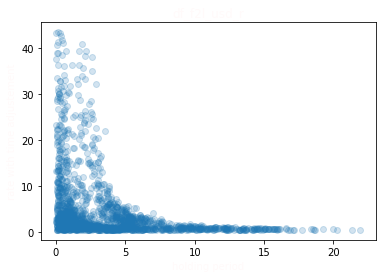

In [20]:
#plot diagram
df_last_two_eth_r = run_plot_graph(df_last_two_r_eth2[['holding_period']], df_last_two_r_eth2[['eth_r']], "df_last_two_eth_r")
df_last_two_usd_r = run_plot_graph(df_last_two_r_usd2[['holding_period']], df_last_two_r_usd2[['usd_r']], "df_last_two_usd_r")
df_f2l_eth_r = run_plot_graph(df_f2l_r_eth2[['holding_period']], df_f2l_r_eth2[['eth_r']], "df_f2l_eth_r")
df_f2l_usd_r = run_plot_graph(df_f2l_r_usd2[['holding_period']], df_f2l_r_usd2[['usd_r']], "df_f2l_usd_r")